# Домашняя работа по анализу данных №4

### Выполнил: Родин Владимир

### Импорт необходимых библиотек

In [93]:
import pandas as pd 
import numpy as np
import scipy.stats as sts

import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict

In [94]:
# Отключение некоторых лишних предупреждений
import warnings
warnings.filterwarnings("ignore")

In [95]:
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (8, 4)

# Часть 1: Процедура проверки гипотез

## Задача №1: Экзамен

### Пункт а) [5 баллов] Проверьте гипотезу о том, что студенты, получившие высшее образование (associate's degree, bachelor's degree, master's degree) в среднем пишут математику на большее число баллов, чем студенты со средним образованием (high school, some high school, some college).

In [96]:
df_1 = pd.read_csv('students_exam.csv')
df_1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [97]:
cond_high = (df_1['parental level of education'] == "associate's degree") | (df_1['parental level of education'] == "bachelor's degree") | (df_1['parental level of education'] == "master's degree")
high =  df_1['math score'][cond_high]
high.head()

0     72
2     90
3     47
5     71
10    58
Name: math score, dtype: int64

In [98]:
cond_middle = (df_1['parental level of education'] == "high school") | (df_1['parental level of education'] == "some high school") | (df_1['parental level of education'] == "some college")
middle = df_1['math score'][cond_middle]
middle.head()

1    69
4    76
6    88
7    40
8    64
Name: math score, dtype: int64

Я хочу воспользоваться критерием стюдента для разности математических ожиданий при неизвестный дисперсиях. Рассмотрим дисперсии.

In [99]:
print(f'Выборочная дисперсия оценок по математике детей родителей с высшим образованием: {np.var(high)}')
print(f'Выборочная дисперсия оценок по математике детей родителей с средним образованием: {np.var(middle)}')
# я немного не понял, что именно значит "parental level of educatio", но это не так важно

Выборочная дисперсия оценок по математике детей родителей с высшим образованием: 226.0236430675689
Выборочная дисперсия оценок по математике детей родителей с средним образованием: 225.13533461978224


Получились очень близкие значения. Рассмотрим гипотезу 
$$
\begin{aligned}
&H_0: \hspace{2mm} σ_{high}^2 = σ_{middle}^2 \hspace{2mm} \\
&H_1: \hspace{2mm} σ_{high}^2 ≠ σ_{middle}^2 \hspace{2mm}
\end{aligned}
$$

In [100]:
F_stat = np.var(middle) / np.var(high)
f_ = sts.f(len(middle) - 1, len(high) - 1)

print(f'Левая граница F-теста: {f_.ppf(0.025)}')
print(f'Правая граница F-теста: {f_.ppf(0.975)}')
print(f'F-stat = {F_stat}')
print(f'P-value = {f_.sf(F_stat)}')

Левая граница F-теста: 0.8371445997442876
Правая граница F-теста: 1.1984863551226816
F-stat = 0.9960698428017059
P-value = 0.5196306182535997


F-статистика попала в необходимый интервал, следовательно основная гипотеза не отвергается. Далее я считаю, что оценки имеют одинаковую дисперсию. По условию я рассматриваю только правую 95% границу теста.

In [101]:
var_emp = (np.var(high) * (len(high) - 1) + np.var(middle) * (len(middle) - 1)) / (len(high) + len(middle) - 2) 
t_stat = (np.mean(high) - np.mean(middle)) / (np.sqrt(var_emp) * np.sqrt(1 / len(high) + 1 / len(middle)))
t_ = sts.t(len(high) + len(middle) - 2)

print(f'Правая граница t-теста: {t_.ppf(0.95)}')
print(f't-stat = {t_stat}')
print(f'P-value = {t_.sf(t_stat)}')

Правая граница t-теста: 1.6463818766348755
t-stat = 4.3154459745185925
P-value = 8.756713246312976e-06


$t_{stat} > t_{crit}$, следовательно основная гипотеза отвергается. Вывод: студенты, получившие высшее образование в среднем пишут математику на большее число баллов, чем студенты со средним образованием.

### Пункт б) [5 баллов] Правда ли что в среднем студенты пишут экзамен по reading так же, как и по math?

In [102]:
reading = df_1['reading score'] 
math = df_1['math score']

В данном случае я работаю с оценками одних и тех же студентов, но за разные предметы. Эти две выборки являются связанными, поэтому я воспользуюсь соответсвующей формулой.  
P.S. Формула эта была только на семинаре по математической статистике.

In [103]:
t_ = sts.t(len(math) - 1)
mean_diff = np.mean(math) - np.mean(reading) 
sigm = np.sum((math - reading - mean_diff) ** 2) / (len(math) - 1) 

l = mean_diff - t_.ppf(0.95) * np.sqrt(sigm) / np.sqrt(len(math))
r = mean_diff + t_.ppf(0.95) * np.sqrt(sigm) / np.sqrt(len(math))

print(f'Левая граница ДИ для разности математических ожиданий: {l}.')
print(f'Правая граница ДИ для разности математических ожиданий: {r}.')

Левая граница ДИ для разности математических ожиданий: -3.5488187259128376.
Правая граница ДИ для разности математических ожиданий: -2.611181274087159.


Изначальная гипотеза состояла в том, что средние отметки равны (== их разность равна нулю). Однако нуль не попадает в расчитанный доверительный интервал. Следовательно, на 95% уровне значимости основная гипотеза отвергается.

## Задача №2: О мышах и людях

In [104]:
df = pd.read_csv('mouse.csv', sep='\t')

# отбираем нужные колонки
df = df[['STUDY', 'AGE', 'GENDER', 'DECISION', 'RT']]

# удаляем пропуски по колонке DECISION (то есть тех, кто не смог принять решение)
df = df[~df.DECISION.isnull()]

df

,STUDY,AGE,GENDER,DECISION,RT
3,1,21,0,1.0,9.212427
4,1,20,0,1.0,17.071711
5,1,21,1,1.0,9.827884
6,1,23,1,1.0,10.143030
7,1,20,1,1.0,7.447534
...,...,...,...,...,...
286,2,20,1,1.0,NaN
287,2,21,1,1.0,NaN
288,2,19,0,0.0,NaN
289,2,21,0,1.0,NaN


### Пункт а) [5 баллов] Попытаемся ответить на тот же вопрос, что и исследователи. В какой из двух ситуаций респонденты чаще принимают решение нажать кнопку: в реальной или на бумаге?

Для оценки разности долей я построю асимптотическую оценку для разности долей)

In [105]:
n1 = len(df['DECISION'][df['STUDY'] == 1])
emp_p1 = np.sum(df['DECISION'][df['STUDY'] == 1]) / n1 # оценка параметра p1

n2 = len(df['DECISION'][df['STUDY'] == 2])
emp_p2 = np.sum(df['DECISION'][df['STUDY'] == 2]) / n2

In [106]:
emp_std = np.sqrt(emp_p1 * (1 - emp_p1) / n1 + emp_p2 * (1 - emp_p2) / n2) #выборочная дисперсия разности 
z_stat = (emp_p1 - emp_p2) / emp_std
z_crit = sts.norm.ppf(0.95)

print(f'Правая граница Z-теста: {z_crit}')
print(f'z-stat = {z_stat}')
print(f'P-value = {sts.norm.sf(z_stat)}')

Правая граница Z-теста: 1.6448536269514722
z-stat = 2.188656189521926
P-value = 0.014310919249249956


$|z_{stat}| > z_{crit}$, следовательно основная гипотеза отвергается. Вывод: респонденты чаще принимают решение нажать кнопку на бумаге.

### Пункт б) [5 баллов] Кровожадные люди быстро берут на себя ответственность за удар мышки током. Будем считать, что кровожадные люди принимают решение менее, чем за пять секунд. Правда ли, что люди по своей природе кровожадные?

In [107]:
time_bloodthirst = df['RT'][(df['STUDY']==1) & (df['DECISION']==1)] # время тех, кто в первом испытании нажал на кнопку

In [108]:
n = len(time_bloodthirst)
t_stat = (np.mean(time_bloodthirst) - 5) / (np.sqrt(np.var(time_bloodthirst) / n))
t_ = sts.t(n - 1)

print(f'Левая граница t-теста: {t_.ppf(0.05)}')
print(f't-stat = {t_stat}')
print(f'P-value = {t_.sf(t_stat)}')

Левая граница t-теста: -1.654140976294133
t-stat = 13.014154424812853
P-value = 2.140782322412007e-27


$t_{stat} > t_{crit}$, следовательно основная гипотеза отвергается. Вывод: По своей природе люди не кровожадны.

## Задача №3: Парадокс

### Пункт а) [5 баллов] Давайте попробуем найти ответ на вопрос, есть ли эффект от лекарства для мужчин?

In [109]:
print('Доля выздровевших мужчин, которые принимали лекарство: {a}.'.format(a= 770 / (770 + 88))) 
print('Долю выздровевших мужчин, которые не принимали лекартсво {a}.'.format(a= 88 /  (770 + 88)))

Доля выздровевших мужчин, которые принимали лекарство: 0.8974358974358975.
Долю выздровевших мужчин, которые не принимали лекартсво 0.10256410256410256.


#### Создадим матрицу размера 2x2. Внесём в неё частоты, полученные для мужчин.

In [110]:
men = np.array([[770, 880], [88, 135]])

In [111]:
print(f'P-value = {sts.chi2_contingency(men, correction=False)[1]}')

P-value = 0.04268446899604581


При 5% уровне значимости основная гипотеза отвергается. Однако уже на уровне в 4% мы гипотезу не отвергаем. То есть, при расширении выборки велик риск не отвержения основной гипотезы.

### Пункт б) [10 баллов] Сделайте всё то же самое, но руками, без помощи библиотеки.

#### Используя матрицу из предыдущего пункта, посчитайте общее количество испытуемых мужчин.

In [112]:
men_total = np.sum(men) 
print(f'Общее количество испытуемых мужчин = {men_total}')

Общее количество испытуемых мужчин = 1873


#### Посчитайте отдельно количество испытуемых мужчин, которые принимали лекарство, и которые не принимали его (n1, n2).

In [113]:
n1 = np.sum(men, axis=1)[0] 
n2 = np.sum(men, axis=1)[1] 

print(f'Количество испытуемых мужчин, которые принимали лекарство = {n1}')
print(f'Количество испытуемых мужчин, которые не принимали лекарство = {n2}')

Количество испытуемых мужчин, которые принимали лекарство = 1650
Количество испытуемых мужчин, которые не принимали лекарство = 223


#### Найдите вероятности выздороветь или нет (независимо от группы по приему / не приему лекарства).

In [114]:
prob_recov = np.sum(men, axis=0) / men_total
print(f'Вероятность выздороветь = {prob_recov[0]}')
print(f'Вероятность не выздороветь = {prob_recov[1]}')

Вероятность выздороветь = 0.4580886278697277
Вероятность не выздороветь = 0.5419113721302723


#### Расчитайте ожидаемые (теоретические) значения для каждой ячейки матрицы.  Для этого перемножьте вероятности из предыдущего пункта со значениями n1 и n2. Полученную матрицу можно сравнить с выводом библиотеки scipy.stats, она должна быть идентичной.

In [115]:
theor_matrix_men = np.array([[n1 * prob_recov[0], n1 * prob_recov[1]], [n2 * prob_recov[0], n2 * prob_recov[1]]])
print('Матрица теоретических значений:') 
print()
print(theor_matrix_men)

Матрица теоретических значений:

[[755.84623599 894.15376401]
 [102.15376401 120.84623599]]


In [116]:
print('Матрица теоретических значений из предыдущего пункта:')
print()
print(sts.chi2_contingency(men, correction=False)[3])

Матрица теоретических значений из предыдущего пункта:

[[755.84623599 894.15376401]
 [102.15376401 120.84623599]]


#### Расчитайте наблюдаемую статистику и найдите p_value с помощью sts.chi2.cdf с параметром df = 1.

In [117]:
chi_stat = ((men - theor_matrix_men) ** 2) / theor_matrix_men
chi_stat = np.sum(chi_stat) 
print(f'Chi2-статистика = {chi_stat}')

Chi2-статистика = 4.107854906463222


In [118]:
print(f'P-value = {1 - sts.chi2.cdf(chi_stat, df=1)}') # P-value = 1 - cdf

P-value = 0.04268446899604583


При 5% уровне значимости основная гипотеза отвергается. Совпадает с значением полученным через stats.

### Пункт в) [5 баллов] Ответьте на вопрос: есть ли эффект от лекарства для женщин? (повторите процедуру пункта а)

In [119]:
print('Доля выздровевших женщин, которые принимали лекарство: {a}.'.format(a= 165 / (165 + 440))) 
print('Долю выздровевших женщин, которые не принимали лекартсво: {a}.'.format(a= 440 / (165 + 440)))

Доля выздровевших женщин, которые принимали лекарство: 0.2727272727272727.
Долю выздровевших женщин, которые не принимали лекартсво: 0.7272727272727273.


In [120]:
women = np.array([[165, 80], [440, 310]]) 

In [121]:
print(f'P-value = {sts.chi2_contingency(women, correction=False)[1]}')

P-value = 0.015679686056826774


При 5% уровне значимости основная гипотеза отвергается.

### Пункт г) [5 баллов] Ответьте на вопрос: есть ли эффект от лекарства для объединенной группы?

#### Ответьте на вопрос: есть ли эффект от лекарства для объединенной группы?

In [122]:
people = women + men
print(people)

[[935 960]
 [528 445]]


In [123]:
print(f'P-value = {sts.chi2_contingency(people, correction=False)[1]}')

P-value = 0.012492547994073244


При 5% уровне значимости основная гипотеза отвергается.

#### Соотносится ли это с результатами по группам мужчин и женщин, взятых отдельно?

 Для мужчин P-value был гораздо выше, однако P-value по обеим группам оказался очень низким, он больше похож на P-value для женщин. То есть для мужчин отдельно мы могли бы основную гипотезу и не отвергать, а для женщин и всей группы- отвергаем точно.

# Часть 2: А/Б-тестирование

## а) [10 баллов] Подсчет размера выборки для А/Б-теста

In [124]:
MDE = 5
sigm2_a = 20 ** 2
sigm2_b = 20 ** 2
z_alph = sts.norm.ppf(1 - 0.05 / 2)
z_beta = sts.norm.ppf(1 - 0.2)

n = ((sigm2_a + sigm2_b) * ((z_alph + z_beta) ** 2)) / (MDE ** 2) 

import math
n = math.ceil(n * 2 / 200) 

print(f'Тест нужно будет крутить {n} дня.')

Тест нужно будет крутить 3 дня.


## б) [25 баллов] Симуляция А/Б-теста

### 1.Сгенерируйте выборку данных из нормального распределения для группы А и Б в конкретный один день. Считайте, что в группе Б математическое ожидание составляет 105 у.е., то есть с учетом размера вашего минимального ожидаемого эффекта из предыдущего пункта.

In [125]:
np.random.seed(5401860)
A = sts.norm(loc=100, scale=20).rvs(100)
B = sts.norm(loc=105, scale=20).rvs(100)

### 2. Теперь представим, что наш тест был X запущен  дней.   
Напишите функцию, которая за этот период теста собирает в DataFrame следующие данные на каждый день теста:  
A. cреднее метрики в группе А
Б. среднее метрики в группе Б   
C. p-value, посчитанное с помощью t-test – можно воспользоваться встроенной функцией scipy.stats.ttest_ind.  
Соберите DataFrame для X = 50.

Насколько я понял задание, что функция должна принимать значения каждый день и вносить их в таблицу. Но я буду просто генерировать данные, поэтому сразу создам вектор нужной размерности и функцию напишу именно для такого вектора.

In [126]:
def data_collector(A, B):
    dictt = {'Среднее в группе А': [], 'Среднее в группе Б': [], 'P-value': [], 'День': []}
   
    for i in range(1, 51):
        
        A_res = A[:i].reshape(1, -1)[0] # последовательно получаю вектора, где каждый следующий включает все предыдущие
        B_res = B[:i].reshape(1, -1)[0]
        
        dictt['Среднее в группе А'].append(np.mean(A_res)) 
        dictt['Среднее в группе Б'].append(np.mean(B_res))
        dictt['P-value'].append(sts.ttest_ind(A_res, B_res)[1])
        dictt['День'].append(i)
        
        df = pd.DataFrame(dictt)
        df.set_index('День', inplace=True) 
    return df

In [127]:
np.random.seed(5401860)
X_a = sts.norm(loc=100, scale=20).rvs((100, 50)) # выборка на 50 дней
X_b = sts.norm(loc=105, scale=20).rvs((100, 50))
df = data_collector(X_a, X_b)
df.head()

,Среднее в группе А,Среднее в группе Б,P-value
День,,,
1,100.835899,106.528908,0.147898
2,99.156469,104.482431,0.045373
3,98.729437,105.749409,0.001076
4,98.768436,105.380935,0.000570
5,98.273836,105.423907,0.000041


### 3. На основе DataFrame из предыдущего пункта постройте график динамики среднего в группе А и в группе Б по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится.

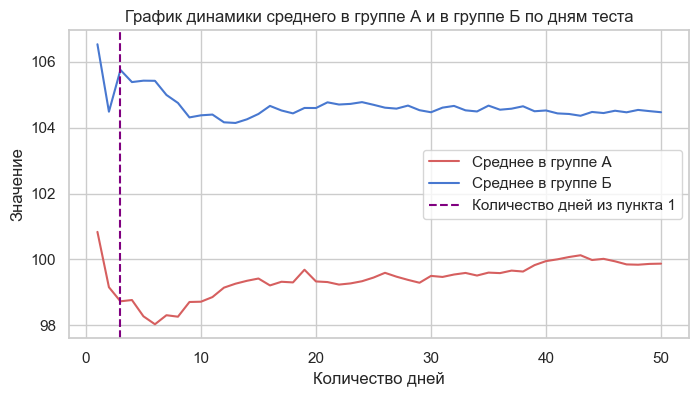

In [128]:
plt.plot(df['Среднее в группе А'], c='r', label='Среднее в группе А')
plt.plot(df['Среднее в группе Б'], c='b', label='Среднее в группе Б')
plt.axvline(n, c='purple', label='Количество дней из пункта 1', ls='--')
plt.legend()
plt.title('График динамики среднего в группе А и в группе Б по дням теста')
plt.xlabel('Количество дней')
plt.ylabel('Значение')
plt.show()

### 4. На основе DataFrame из предыдущего пункта постройте график динамики p-value по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится. Также отложите горизонтальную линию – ваш уровень значимости.

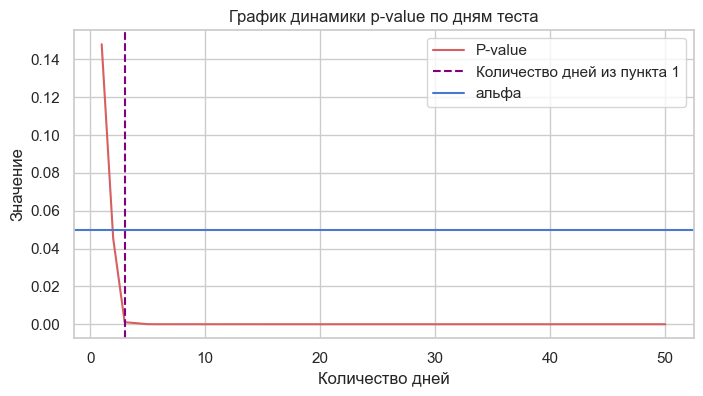

In [129]:
alpha = 0.05
plt.plot(df['P-value'], c='r', label='P-value')
plt.axvline(n, c='purple', label='Количество дней из пункта 1', ls='--')
plt.axhline(alpha, c='b', label='альфа', ls='-')
plt.title('График динамики p-value по дням теста')
plt.xlabel('Количество дней')
plt.ylabel('Значение')
plt.legend()
plt.show()

### 5. Перегенируруйте шаги 2-4 несколько раз, посмотрев на графики. Что вы видите? Что происходит с p-value в периодах:  
A. до кол-ва дней, посчитанных по формуле из п.1  
Б.в точке кол-ва дней, посчитанных по формуле из п.1  
С. после кол-ва дней, посчитанных по формуле из п.1  
Опишите выводы максимально подробно.

Определею функцию- генератор графиков.

In [130]:
def graphs(loc_b, seed): # выводит графики в зависимости от мат ожидания группы Б
    np.random.seed(seed)
    X_a = sts.norm(loc=100, scale=20).rvs((100, 50))
    X_b = sts.norm(loc=loc_b, scale=20).rvs((100, 50))
    df = data_collector(X_a, X_b)
    
    plt.plot(df['Среднее в группе А'], c='r', label='Среднее в группе А')
    plt.plot(df['Среднее в группе Б'], c='b', label='Среднее в группе Б')
    plt.axvline(n, c='purple', label='Количество дней из пункта 1', ls='--')
    plt.title('График динамики среднего в группе А и в группе Б по дням теста')
    plt.xlabel('Количество дней')
    plt.ylabel('Значение')
    plt.legend()
    plt.show()
    
    alpha = 0.05
    plt.plot(df['P-value'], c='r', label='P-value')
    plt.axvline(n, c='purple', label='Количество дней из пункта 1', ls='--')
    plt.axhline(alpha, c='b', label='альфа', ls='-')
    plt.title('График динамики p-value по дням теста')
    plt.xlabel('Количество дней')
    plt.ylabel('Значение')
    plt.legend()
    plt.show()

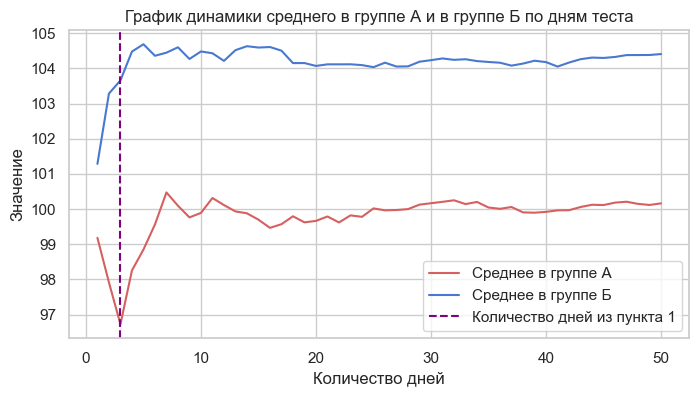

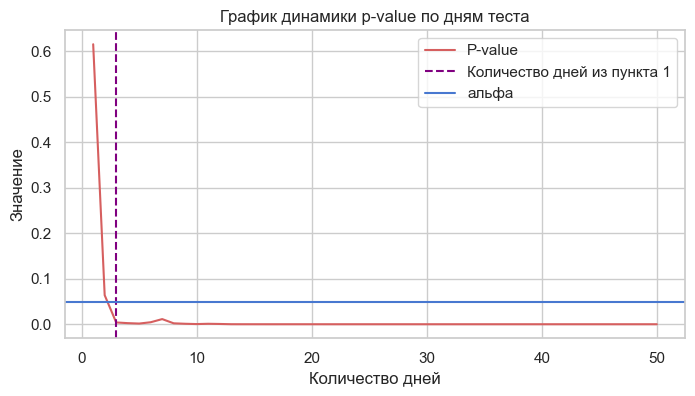

In [131]:
graphs(105, seed=100)

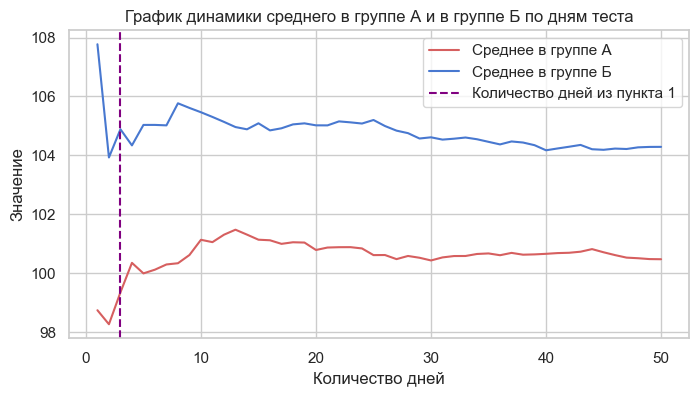

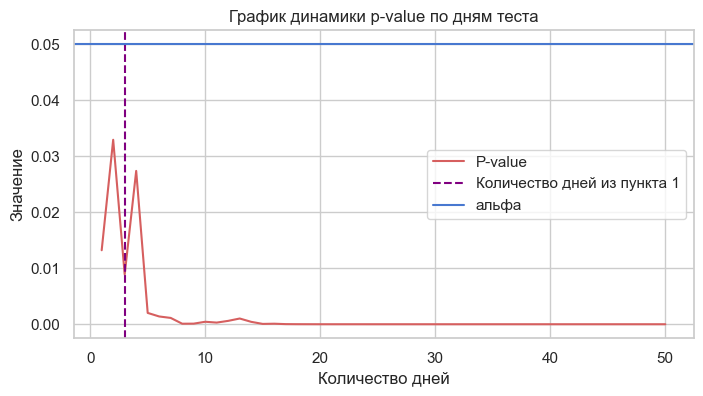

In [132]:
graphs(105, seed=205)

До n-го дня наблюдения принимает разные значений (зачастую выше чем коэффициент альфы). Однако после n-го дня P-value начинает быстро стремиться к нулю. 

### 6. Теперь предположим, что мы поменяли наш MDE до 1 у.е. То есть мат. ожидание в группе А осталось по-прежнему 100, а вот в группе Б теперь 101. Перегенерируйте пункты 2-4 для измененного, при этом кол-во дней в п.1 не пересчитывайте. Что происходит с p-value? Сделайте выводы.

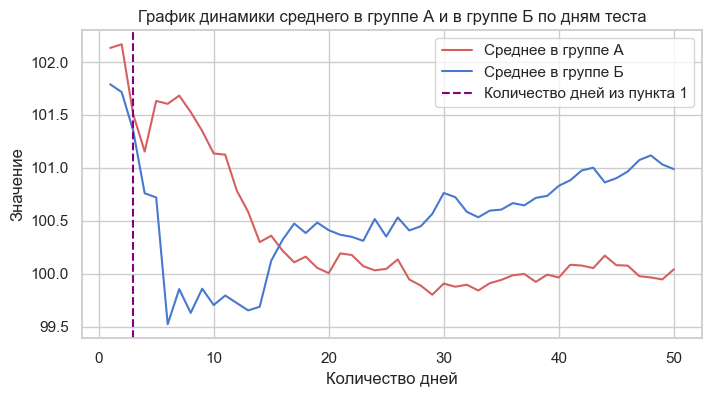

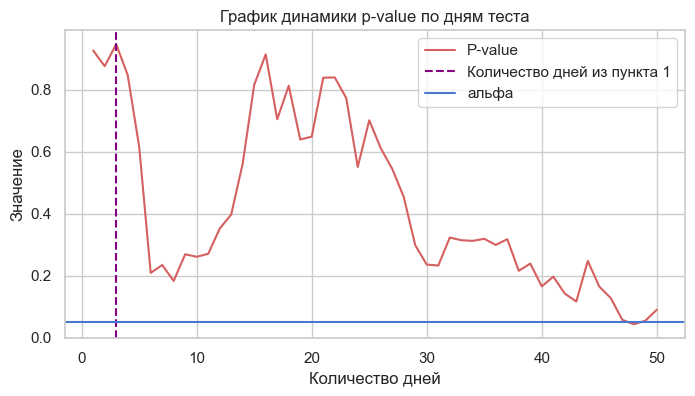

In [133]:
graphs(101, seed=300)

При разных генерациях диапозон значений P-value отличается. Он очень сильно волатилен. Для MDE = 1 нужно в районе 63 дней наблюдений, чтобы получить вразумительный ответ при имеющихся условиях. То есть при 63 дней вероятнее всего что мы при прочих равных сможем нормально проверить гипотезу.

## с) [20баллов] Симуляция А/А-теста

### И снова перегенерируйте вышесделанные пункты 2-4. Что происходит с p-value? Может ли оно оказаться ниже уровня значимости?

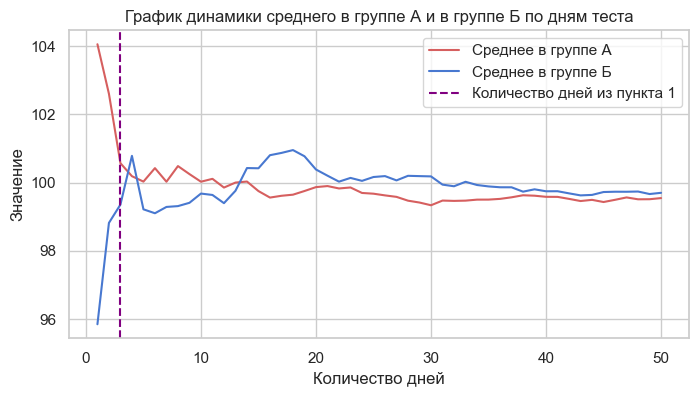

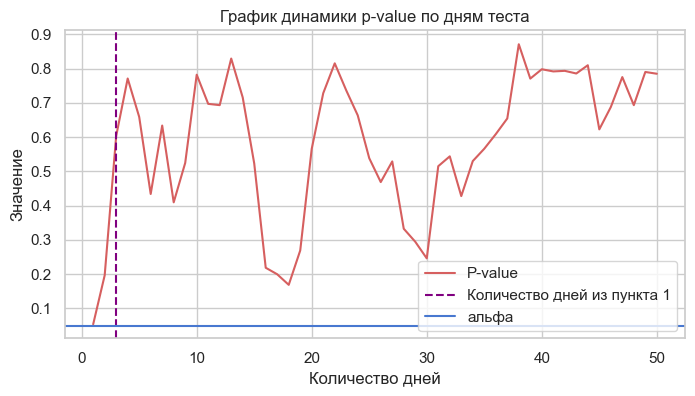

In [134]:
graphs(100, seed=400)

P-value принимает самые различные значения. В конкретный день он может оказаться даже ниже уровня значимости.

### 2. Ну и напоследок, напишите функцию, которая генерирует p-value на последний день A/A теста. А затем запустите эту функцию 1000 раз, собрав  значений p-value. Постройте гистограмму их распределения. Что вы видите?

In [135]:
def p_value1000(A, B):
        return sts.ttest_ind(A, B, axis=1)[1] # на выходе вектор p-value на последний день каждой генерации

In [136]:
np.random.seed(5401860)
A1 = sts.norm(loc=100, scale=20).rvs((1000, 5000)) 
# в последний день мы имеем 50 * 100 наблюдений для А (и второго А соответсвенно). Сгенерируем 1000 таких последних дней
A2 = sts.norm(loc=100, scale=20).rvs((1000, 5000))

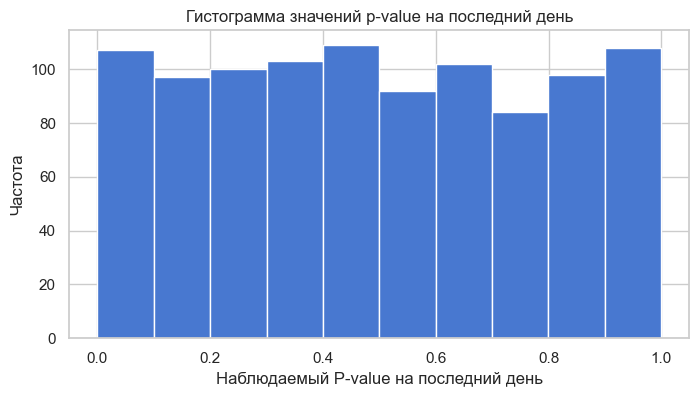

In [137]:
plt.hist(p_value1000(A1, A2))
plt.xlabel('Наблюдаемый P-value на последний день')
plt.ylabel('Частота')
plt.title('Гистограмма значений p-value на последний день')
plt.show()

Я вижу гистограмму, напоминающую гистограмму случайной величины, имеющей равномерное распределение. Можно сделать вывод, что значение P-value случайно. Более того, несложно посчитать вероятность того, что P-value будет ниже чем любой уровень значимости. 